In [48]:
## Gaussian fitting tests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import Rb_blackfly_image_gauss as fits
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
import scipy.signal

In [2]:
img=Image.open('test_FORT_image.png')
data=np.array(img)

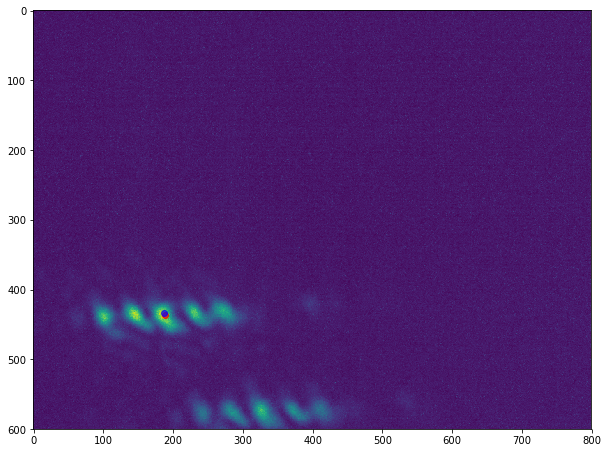

In [13]:
fig=plt.figure(figsize=(10,10))
plt.imshow(data)
plt.scatter(fits.fort_gauss(data)['x'],fits.fort_gauss(data)['y'],color='r',alpha=0.7);
plt.scatter(np.unravel_index(np.argmax(data),data.shape)[1],np.unravel_index(np.argmax(data),data.shape)[0],color='b',alpha=0.7);
plt.show()

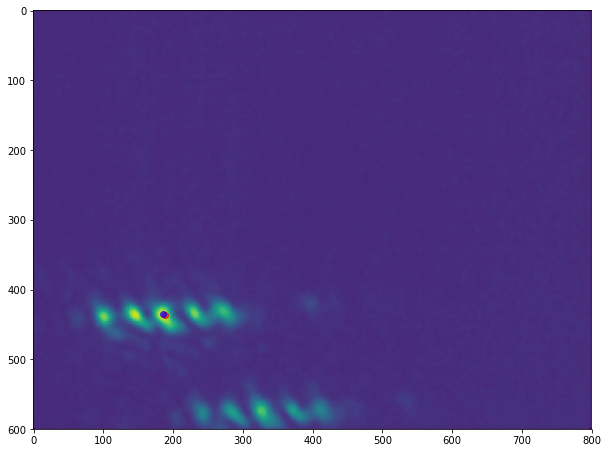

In [58]:
fig=plt.figure(figsize=(10,10))
filtered_data=scipy.signal.medfilt(data,kernel_size=[7,7]);
plt.imshow(filtered_data);
plt.scatter(fits.fort_gauss(filtered_data)['x'],fits.fort_gauss(filtered_data)['y'],color='r',alpha=0.7);
plt.scatter(np.unravel_index(np.argmax(filtered_data),filtered_data.shape)[1],np.unravel_index(np.argmax(filtered_data),filtered_data.shape)[0],color='b',alpha=0.7);
plt.show()

In [68]:
def detect_peaks(image):
    """
    Takes an image and detect the peaks usingthe local maximum filter.
    Returns a boolean mask of the peaks (i.e. 1 when
    the pixel's value is the neighborhood maximum, 0 otherwise)
    """

    # define an 8-connected neighborhood
    neighborhood = generate_binary_structure(2,2)

    #apply the local maximum filter; all pixel of maximal value 
    #in their neighborhood are set to 1
    local_max = maximum_filter(image, footprint=neighborhood)==image
    #local_max is a mask that contains the peaks we are 
    #looking for, but also the background.
    #In order to isolate the peaks we must remove the background from the mask.

    #we create the mask of the background
    background = (image==0)

    #a little technicality: we must erode the background in order to 
    #successfully subtract it form local_max, otherwise a line will 
    #appear along the background border (artifact of the local maximum filter)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)

    #we obtain the final mask, containing only peaks, 
    #by removing the background from the local_max mask (xor operation)
    detected_peaks = local_max ^ eroded_background

    return detected_peaks

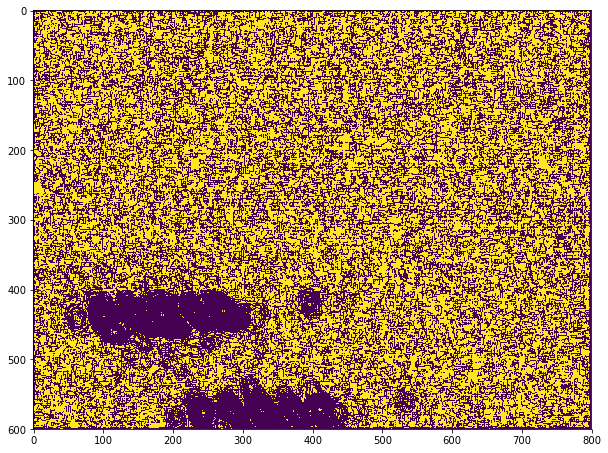

In [69]:
fig=plt.figure(figsize=(10,10))
plt.imshow(detect_peaks(filtered_data))
plt.show()

In [67]:
detect_peaks(filtered_data)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)